# Grid Cell Phase Coding 

The second cell will load the trial data. There are some parameters that can be changed - which **dataset** (1-8) and analysis **type** (spatial/temporal). 

Once the "trial" is initialized, "phase_analysis()" can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
#Some display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sub_bulk_analysis_mpm
import pycircstat
import os
import glob
import numpy as np

dir = 'alldata/'

In [6]:
t_angles = []
rls = []
rcs = []

for trial in os.listdir(dir+'/XYspkT'):
    for channel in range(1,6):
        
        #XYspkT
        xy_names = glob.glob('alldata/XYspkT/'+trial+'/CH'+str(channel)+'*')
        xy_arrs = [np.loadtxt(f, delimiter=',') for f in xy_names]
        XYspkT = np.concatenate(xy_arrs)
        
        #xyPos
        pos_names = glob.glob('alldata/xyPos/'+trial+'/CH'+str(channel)+'*')
        pos_arrs = [np.loadtxt(f, delimiter=',')[::25] for f in pos_names]
        xyPos = np.concatenate(pos_arrs)
        
        #Phase
        phase_names = glob.glob('alldata/phase/'+trial+'/CH'+str(channel)+'*')
        phase_arrs = [np.loadtxt(f, delimiter=',') for f in phase_names]
        phase = np.concatenate(phase_arrs)
        
        #spkT
        spkT_names = glob.glob('alldata/spkT/'+trial+'/CH'+str(channel)+'*')
        spkT_arrs = [np.loadtxt(f, delimiter=',') for f in spkT_names]
        spkT = np.concatenate(spkT_arrs)
        
        run = sub_bulk_analysis_mpm.gridCells(XYspkT, xyPos, phase, spkT, 'temporal', control=False)
        run.phase_analysis()
        t_angles.append(run.angles)
        rls.append(run.rl)
        rcs.append(run.rc)
    

In [7]:
f_angles = []
frls = []
frcs = []

for trial in os.listdir(dir+'/XYspkT'):
    for channel in range(1,6):
        
        #XYspkT
        xy_names = glob.glob('alldata/XYspkT/'+trial+'/CH'+str(channel)+'*')
        xy_arrs = [np.loadtxt(f, delimiter=',') for f in xy_names]
        XYspkT = np.concatenate(xy_arrs)
        
        #xyPos
        pos_names = glob.glob('alldata/xyPos/'+trial+'/CH'+str(channel)+'*')
        pos_arrs = [np.loadtxt(f, delimiter=',')[::25] for f in pos_names]
        xyPos = np.concatenate(pos_arrs)
        
        #Phase
        phase_names = glob.glob('alldata/phase/'+trial+'/CH'+str(channel)+'*')
        phase_arrs = [np.loadtxt(f, delimiter=',') for f in phase_names]
        phase = np.concatenate(phase_arrs)
        
        #spkT
        spkT_names = glob.glob('alldata/spkT/'+trial+'/CH'+str(channel)+'*')
        spkT_arrs = [np.loadtxt(f, delimiter=',') for f in spkT_names]
        spkT = np.concatenate(spkT_arrs)
        
        run = sub_bulk_analysis_mpm.gridCells(XYspkT, xyPos, phase, spkT, 'temporal', control=True)
        run.phase_analysis()
        f_angles.append(run.angles)
        frls.append(run.rl)
        frcs.append(run.rc)
    

In [34]:
tangles = np.asarray([item for sublist in t_angles for item in sublist])
fangles = np.asarray([item for sublist in f_angles for item in sublist])


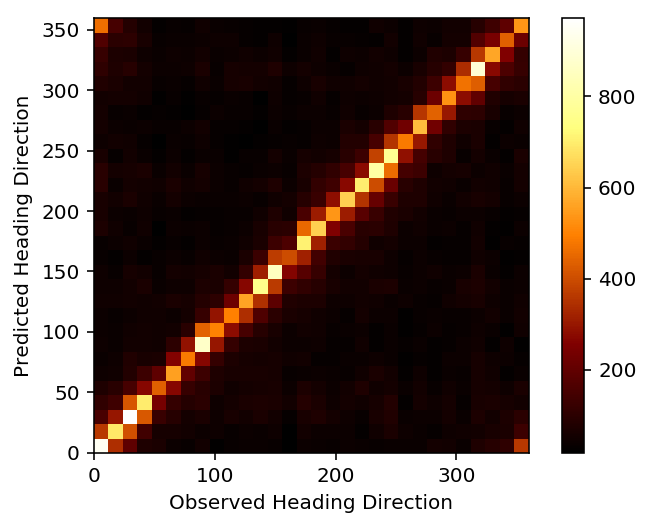

In [11]:
heatmap, xedges, yedges = np.histogram2d(tangles[:, 0], tangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

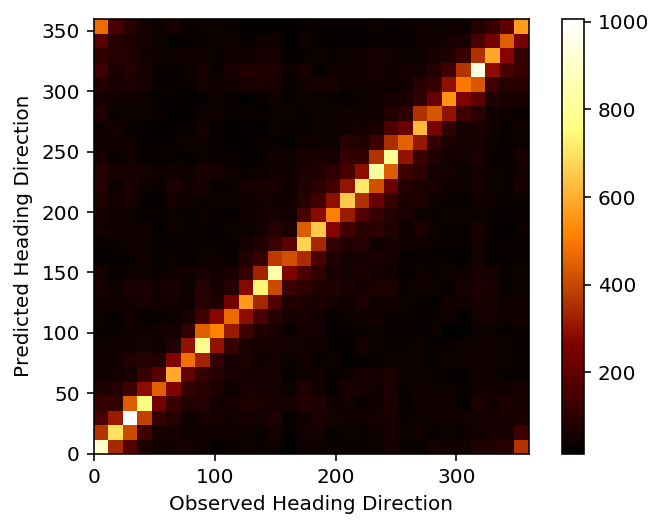

In [12]:
heatmap2, xedges, yedges = np.histogram2d(fangles[:, 0], fangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap2.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

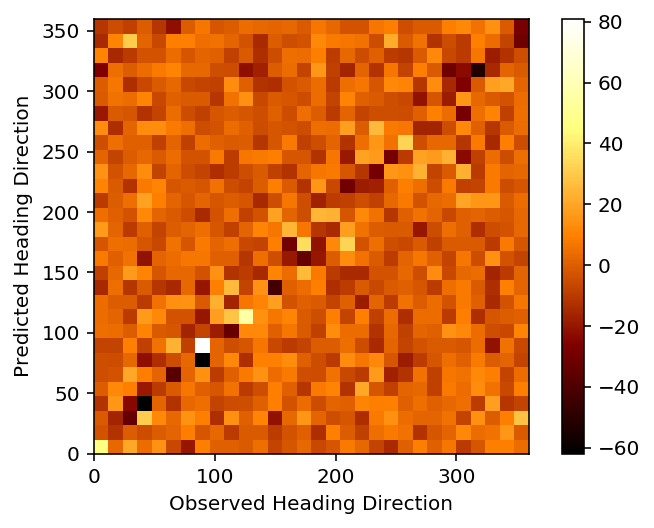

In [32]:
heatmap3, xedges, yedges = np.histogram2d(fangles[:, 0], fangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
diff = heatmap - heatmap2

plt.clf()
plt.imshow(diff.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

C:\Users\Daniel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


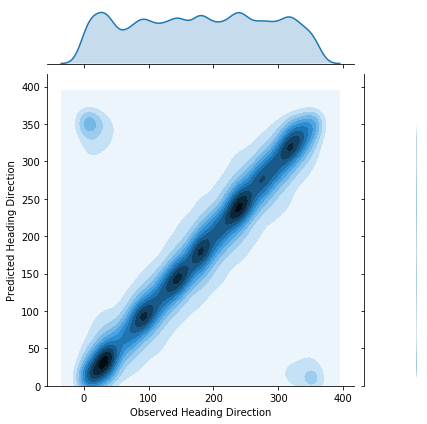

In [6]:
corr_df = pd.DataFrame(data=angles_arr, columns=['Observed Heading Direction', 'Predicted Heading Direction'])
sns.jointplot(x='Observed Heading Direction', y='Predicted Heading Direction', data=corr_df, kind='kde')
plt.ylim(0, None)
plt.xlim(0.1, None)
plt.show()

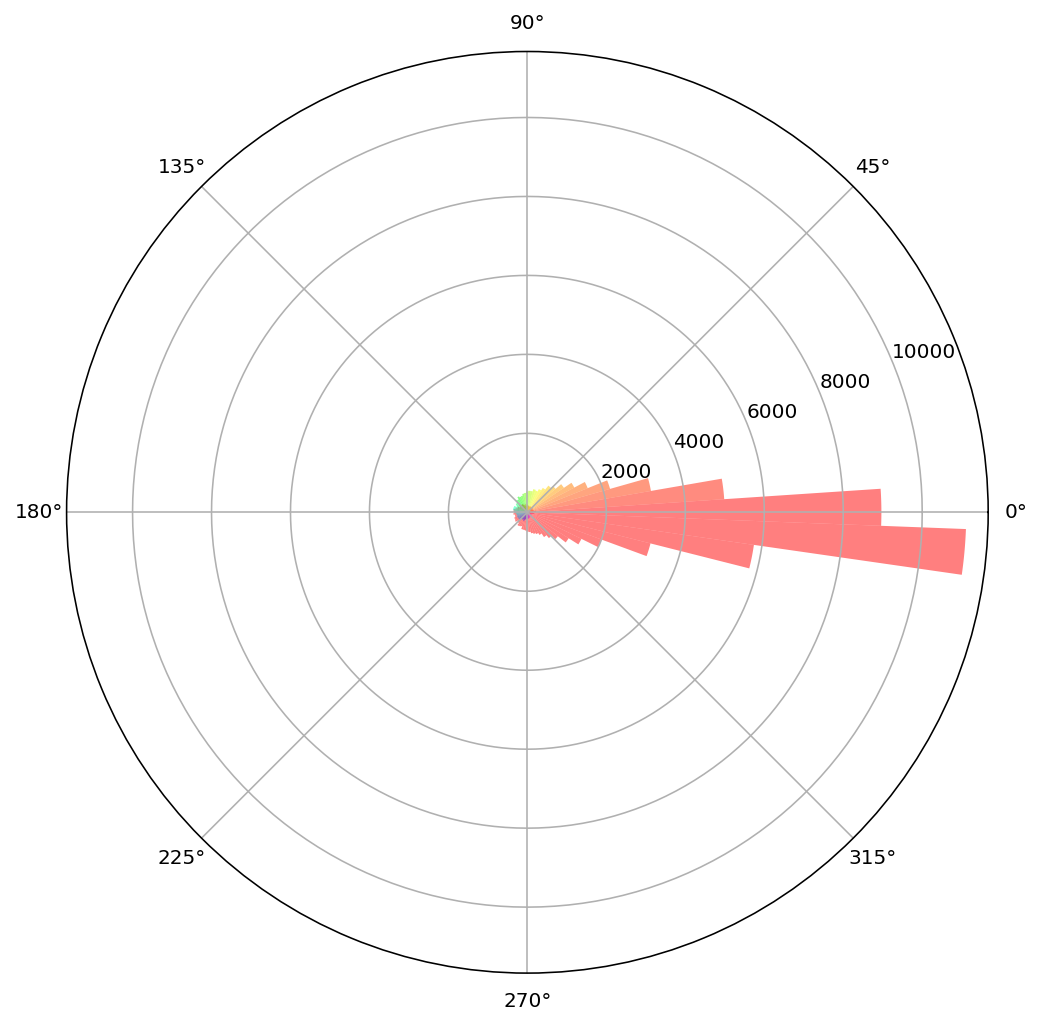

In [24]:
diff = np.sort(tangles[:,0]-tangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()

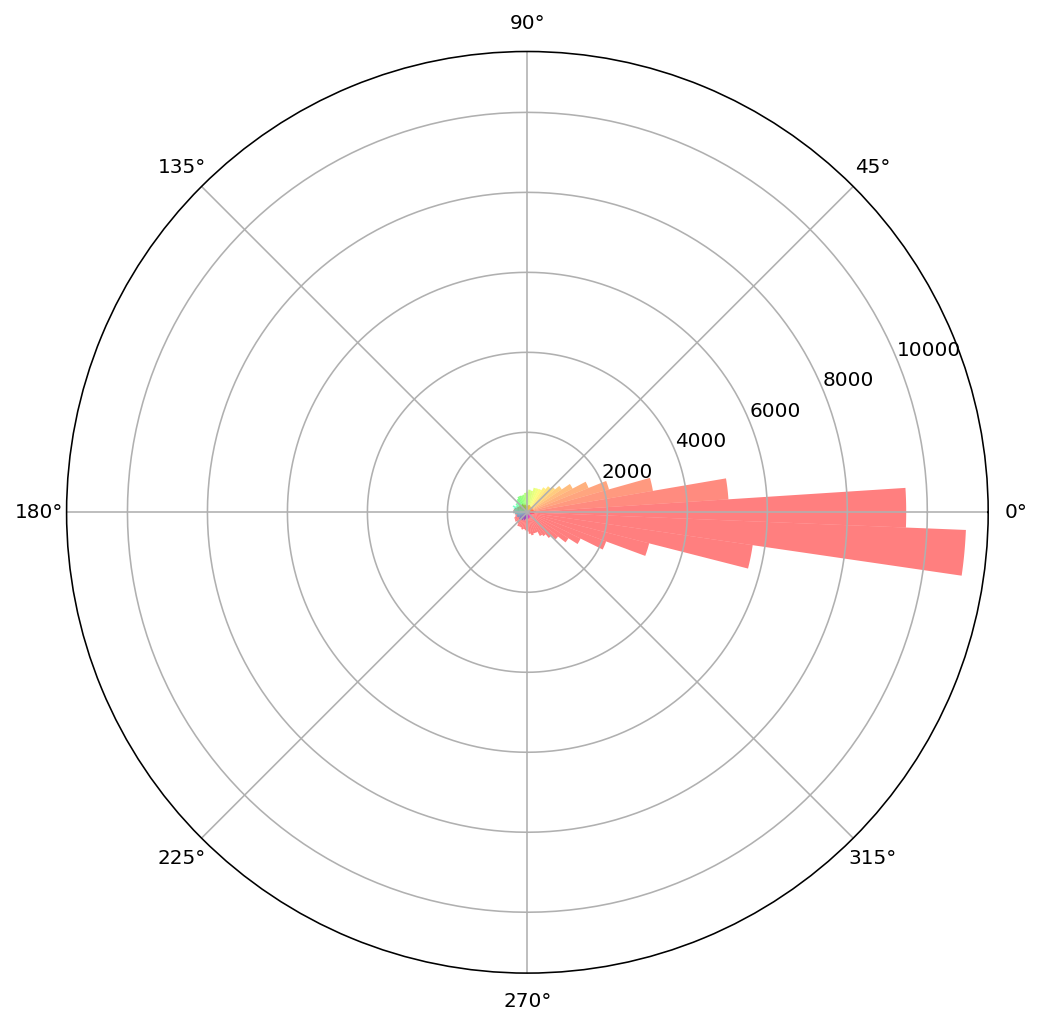

In [25]:
diff = np.sort(fangles[:,0]-fangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()

Text(0.5, 0, 'Circular r')

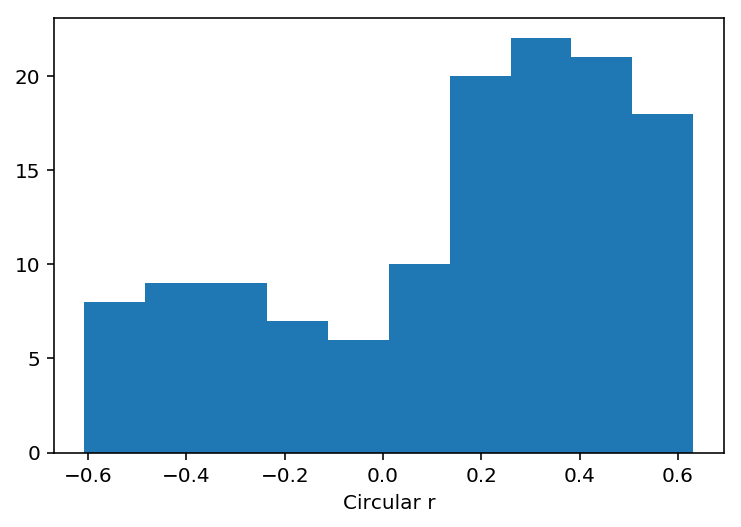

In [16]:
plt.hist(rcs, histtype='stepfilled')
plt.xlabel('Circular r')

Text(0.5, 0, 'Linear r')

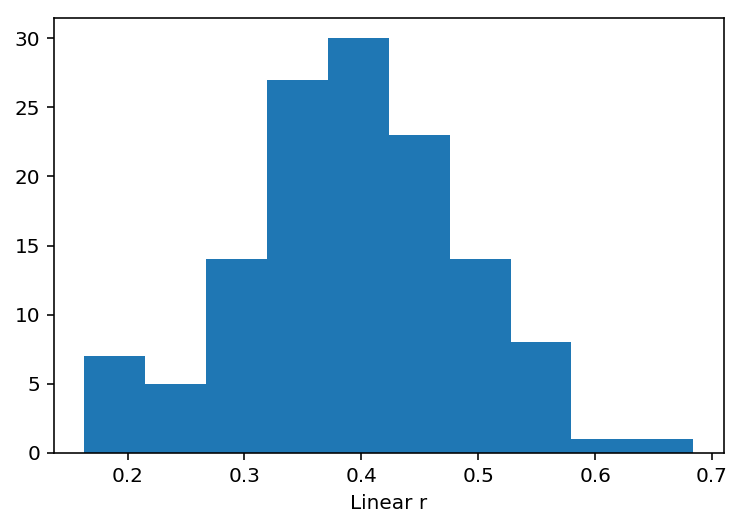

In [17]:
plt.hist(rls)
plt.xlabel('Linear r')

(array([ 6., 11., 15.,  6.,  9.,  8., 13., 16., 25., 21.]),
 array([-0.59717051, -0.47326997, -0.34936943, -0.22546888, -0.10156834,
         0.0223322 ,  0.14623274,  0.27013328,  0.39403383,  0.51793437,
         0.64183491]),
 <a list of 10 Patch objects>)

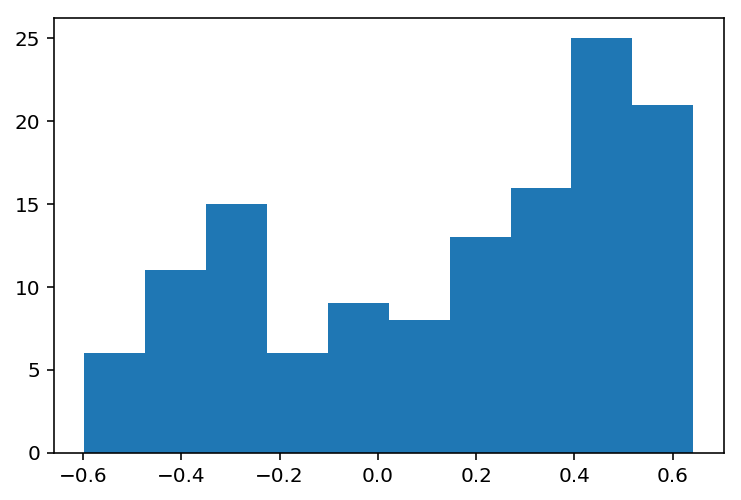

In [23]:
plt.hist(frcs)

In [39]:
tdiff = np.radians(tangles[:,0]-tangles[:,1])
fdiff = np.radians(fangles[:,0]-fangles[:,1])

pycircstat.watson_williams(tdiff,fdiff)

(0.8045286549292219,
                 df            SS        MS         F   p-value
 Source                                                        
 Columns        1.0      0.022735  0.022735  0.061252  0.804529
 Residual  166534.0  81361.467606  0.488558       NaN       NaN
 Total     166535.0  81361.490341       NaN       NaN       NaN)

In [41]:
tdiff.max()

6.2662477705852515